In [85]:
import sys
sys.path.append('../')

import torch
import torch.nn as nn
from torch.optim import Adam, SGD
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn.functional as F

import numpy as np
import pandas as pd
import os
import glob
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

eps = np.finfo(float).eps

plt.rcParams['figure.figsize'] = 10, 10
%matplotlib inline

%load_ext autoreload
%autoreload 2

from models import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
class SimpleNet(nn.Module):
    def __init__(self, width, bias=True):
        super(SimpleNet, self).__init__()
        self.width = 100
        self.bias = bias
        self.network = nn.Sequential(
            nn.Linear(1, self.width, bias=self.bias),
            nn.ReLU(inplace=True),
            nn.Linear(self.width, 1, bias=self.bias),
        )

    def forward(self, x):
        x = self.network(x)
        return x


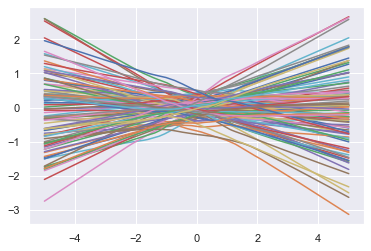

In [40]:
x = torch.linspace(-5, 5, 5000).unsqueeze(1)
for i in range(100):
    model = SimpleNet(100)
    y = model(x)
    plt.plot(x.detach(), y.detach())

In [80]:
xin = torch.tensor([-3, 0.5]).unsqueeze(1)
yin = torch.tensor([2, -1.0]).unsqueeze(1)

In [81]:
# training all networks simultaneously 
width = 100
n_nets = 100
all_networks = [SimpleNet(width) for _ in range(n_nets)]
all_nks = [neural_tangent_kernel_1d(net, xin) for net in all_networks]

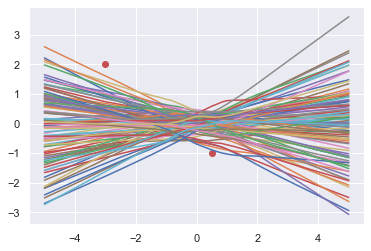

In [82]:
fig, ax = plt.subplots()
ax.scatter(xin.numpy().ravel(), yin.numpy().ravel(), c='r')
for net in all_networks:
    l, = ax.plot(x.detach(), net(x).detach())

In [83]:
for net in tqdm.notebook.tqdm(all_networks, desc='training'):
    gradient_descent(net, xin, yin)

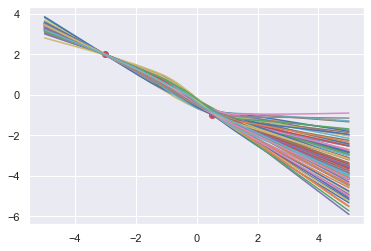

In [84]:
fig, ax = plt.subplots()
ax.scatter(xin.numpy().ravel(), yin.numpy().ravel(), c='r')
for net in all_networks:
    l, = ax.plot(x.detach(), net(x).detach())

### Weight norm change